# Eccentric Binary Neutron Star Search Prospects for Cosmic Explorer

Data Release Companion Notebook

### Import Modules, Set Line Colors, Define Constants

In [1]:
import pycbc.psd
import pycbc.types
from pycbc.detector import Detector
import pycbc.waveform
from pycbc.filter import match
from pycbc import conversions
import gc

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from cycler import cycler

[Accessible Color Generator](https://color.adobe.com/create/color-accessibility)

In [2]:
#CB friendly plot line colors based on viridis
CB_viridis_cycle = ['#85D449', '#31B57A', '#25828E',
                  '#3E4989', '#460B5E']

In [3]:
rcParams['figure.figsize']=(7,7)
rcParams['axes.grid']= True
rcParams["font.family"] = "serif"
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 10
rcParams['axes.prop_cycle'] = cycler(color=CB_viridis_cycle)

In [4]:
td_length = 2048 # seconds
srate = 4096 # Hz
f_low = 3.0 # Hz
N = int(td_length * srate)
fd_length = int(N / 2 + 1)
delta_t = 1.0 / srate
delta_f = 1.0 / td_length

## Figure 1: Signal-to-Noise Ratio as a function of Frequency

In [5]:
psd_ce1 = pycbc.psd.from_txt('noise-files/CE1_strain.txt', 
                             length=fd_length, delta_f=delta_f, 
                             low_freq_cutoff=3.0, is_asd_file=True)
psd_ce2 = pycbc.psd.from_txt('noise-files/CE2_strain.txt', 
                             length=fd_length, delta_f=delta_f, 
                             low_freq_cutoff=3.0, is_asd_file=True)
psd_etd = pycbc.psd.from_txt('noise-files/ETD_Strain.txt', 
                             length=fd_length, delta_f=delta_f, 
                             low_freq_cutoff=1.0, is_asd_file=True)
psd_aligo = pycbc.psd.analytical.aLIGOaLIGODesignSensitivityT1800044(length=fd_length, delta_f=delta_f, 
                                                              low_freq_cutoff=3.0)

In [6]:
m1 = m2 = 1.4

sp_tilde, sc_tilde = pycbc.waveform.get_fd_waveform(approximant="TaylorF2", 
                                                    mass1=m1, mass2=m1, delta_f=delta_f, f_lower=f_low)
sp_tilde.resize(fd_length)
sp_sp_ast = np.absolute(sp_tilde.conj()*sp_tilde)

In [7]:
snr_integrand_ce1 = sp_sp_ast / psd_ce1
snr_integrand_ce2 = sp_sp_ast / psd_ce2
snr_integrand_etd = sp_sp_ast / psd_etd
snr_integrand_aligo = sp_sp_ast / psd_aligo

/work/amber.lenon/projects/eccen/pycbc-3G-search/lib/python3.7/site-packages/PyCBC-0.0a8056-py3.7-linux-x86_64.egg/pycbc/types/array.py:368: RuntimeWarning: invalid value encountered in true_divide
  return self._data / other


In [8]:
norm_ce1 = np.trapz(snr_integrand_ce1[int(f_low / snr_integrand_ce1.delta_f + 1):], 
                    snr_integrand_ce1.sample_frequencies[int(f_low / snr_integrand_ce1.delta_f + 1):])
norm_ce2 = np.trapz(snr_integrand_ce2[int(f_low / snr_integrand_ce2.delta_f + 1):], 
                    snr_integrand_ce2.sample_frequencies[int(f_low / snr_integrand_ce2.delta_f + 1):])
norm_etd = np.trapz(snr_integrand_etd[int(f_low / snr_integrand_etd.delta_f + 1):], 
                    snr_integrand_etd.sample_frequencies[int(f_low / snr_integrand_etd.delta_f + 1):])
norm_aligo = np.trapz(snr_integrand_aligo[int(f_low / snr_integrand_aligo.delta_f + 1):-1], 
                    snr_integrand_aligo.sample_frequencies[int(f_low / snr_integrand_aligo.delta_f + 1):-1])
gc.collect()
norm_snr_integrand_ce1 = snr_integrand_ce1/norm_ce1
norm_snr_integrand_ce2 = snr_integrand_ce2/norm_ce2
norm_snr_integrand_etd = snr_integrand_etd/norm_etd
norm_snr_integrand_aligo = snr_integrand_aligo/norm_aligo

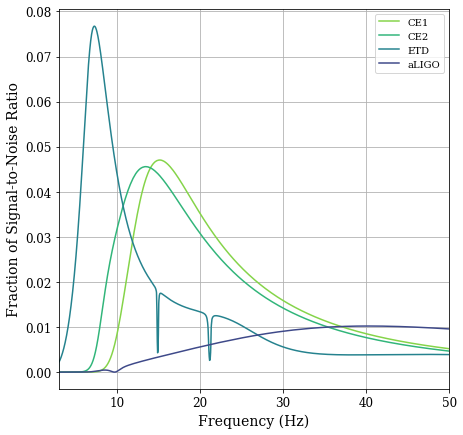

In [9]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(snr_integrand_ce1.sample_frequencies, norm_snr_integrand_ce1, label = "CE1")
plt.plot(snr_integrand_ce2.sample_frequencies, norm_snr_integrand_ce2, label = "CE2")
plt.plot(snr_integrand_etd.sample_frequencies, norm_snr_integrand_etd, label = "ETD")
plt.plot(snr_integrand_aligo.sample_frequencies, norm_snr_integrand_aligo, label = "aLIGO")
plt.legend()
plt.xlim([3,50])
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"Fraction of Signal-to-Noise Ratio")
gc.collect()
plt.show()

## Figure 2: Cumulative Signal-to-Noise Ratio

In [10]:
cumulative_snr_ce1 = np.cumsum(np.flipud(norm_snr_integrand_ce1[int(f_low / snr_integrand_ce1.delta_f + 1):]))/(fd_length*delta_f)
cumulative_snr_ce2 = np.cumsum(np.flipud(norm_snr_integrand_ce2[int(f_low / snr_integrand_ce2.delta_f + 1):]))/(fd_length*delta_f)
cumulative_snr_etd = np.cumsum(np.flipud(norm_snr_integrand_etd[int(f_low / snr_integrand_etd.delta_f + 1):]))/(fd_length*delta_f)
cumulative_snr_aligo = np.cumsum(np.flipud(norm_snr_integrand_aligo[int(f_low / snr_integrand_aligo.delta_f + 1):-1]))/(fd_length*delta_f)

/work/amber.lenon/projects/eccen/pycbc-3G-search/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


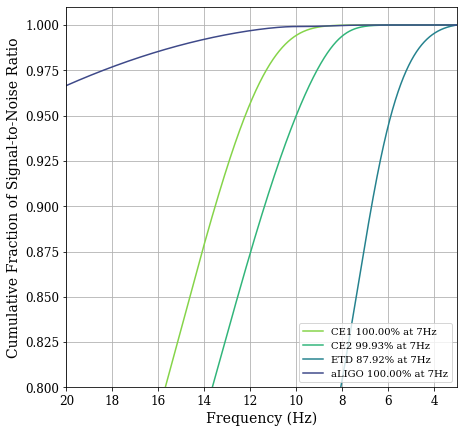

In [11]:
gc.collect()
fig = plt.figure()
fig.patch.set_facecolor('white')
f = np.flipud(snr_integrand_ce1.sample_frequencies[int(f_low / snr_integrand_ce1.delta_f + 1):])
seven_idx = np.where(f<7.0)[0][0]
plt.plot(f, cumulative_snr_ce1, label = "CE1 {snr_frac:.2f}% at 7Hz".format(snr_frac=cumulative_snr_ce1[seven_idx]*100.0))
f = np.flipud(snr_integrand_ce2.sample_frequencies[int(f_low / snr_integrand_ce2.delta_f + 1):])
seven_idx = np.where(f<7.0)[0][0]
plt.plot(f, cumulative_snr_ce2, label = "CE2 {snr_frac:.2f}% at 7Hz".format(snr_frac=cumulative_snr_ce2[seven_idx]*100.0))
f = np.flipud(snr_integrand_etd.sample_frequencies[int(f_low / snr_integrand_etd.delta_f + 1):])
seven_idx = np.where(f<7.0)[0][0]
plt.plot(f, cumulative_snr_etd, label = "ETD {snr_frac:.2f}% at 7Hz".format(snr_frac=cumulative_snr_etd[seven_idx]*100.0))
f = np.flipud(snr_integrand_etd.sample_frequencies[int(f_low / snr_integrand_etd.delta_f + 1):])
seven_idx = np.where(f<7.0)[0][0]
plt.plot(np.flipud(snr_integrand_aligo.sample_frequencies[int(f_low / snr_integrand_aligo.delta_f + 1):-1]), cumulative_snr_aligo, label = "aLIGO {snr_frac:.2f}% at 7Hz".format(snr_frac=cumulative_snr_aligo[seven_idx]*100.0))
plt.legend()
plt.xlim([20,3])
plt.ylim([0.80,1.01])
plt.xlabel("Frequency (Hz)")
plt.ylabel(r"Cumulative Fraction of Signal-to-Noise Ratio")
gc.collect()
plt.show()

## Figure 3 & 4: Non-Eccentric Bank Fitting Factor

In [12]:
injection_sim_file_CE1 = 'fitting-factor-files/noneccentric/noneccentric-CE1-injection.txt'
simulation_data_CE1 = pd.read_csv(injection_sim_file_CE1, sep=" ", header=None)
simulation_data_CE1.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "fitting factor"]
injection_m1_CE1 = simulation_data_CE1['injection_mass1']
injection_m2_CE1 = simulation_data_CE1['injection_mass2']
eccentricity_CE1 = simulation_data_CE1['eccentricity']
ff_CE1 = simulation_data_CE1['fitting factor']

In [13]:
injection_sim_file_CE2 = 'fitting-factor-files/noneccentric/noneccentric-CE2-injection.txt'
simulation_data_CE2 = pd.read_csv(injection_sim_file_CE2, sep=" ", header=None)
simulation_data_CE2.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "fitting factor"]
injection_m1_CE2 = simulation_data_CE2['injection_mass1']
injection_m2_CE2 = simulation_data_CE2['injection_mass2']
eccentricity_CE2 = simulation_data_CE2['eccentricity']
ff_CE2 = simulation_data_CE2['fitting factor']

In [14]:
mchirp_CE1 = conversions.mchirp_from_mass1_mass2(injection_m1_CE1, injection_m2_CE1)
mchirp_CE2 = conversions.mchirp_from_mass1_mass2(injection_m1_CE2, injection_m2_CE2)

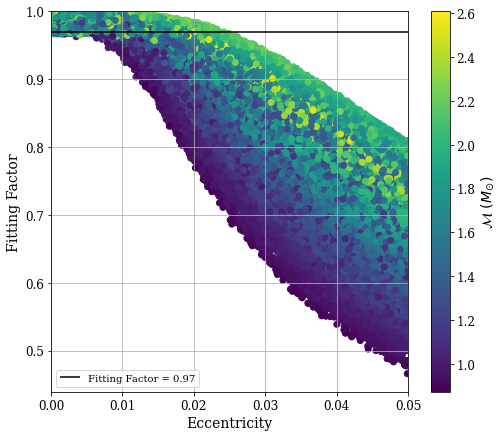

In [15]:
fig = plt.figure(figsize=(8,7))
fig.patch.set_facecolor('white')

#CE1
pos1 = plt.scatter(eccentricity_CE1, ff_CE1, c=mchirp_CE1, cmap='viridis')
plt.hlines(0.97,0,0.05, label = "Fitting Factor = 0.97", color = 'black')
plt.xlim(0,0.05)
plt.ylim(top=1.0)
plt.legend(loc = 'lower left')
plt.xlabel("Eccentricity")
plt.ylabel("Fitting Factor")
cbar = plt.colorbar(pos1)
cbar.set_label(r'$\mathcal{M}~(M_{\odot})$')

plt.show()

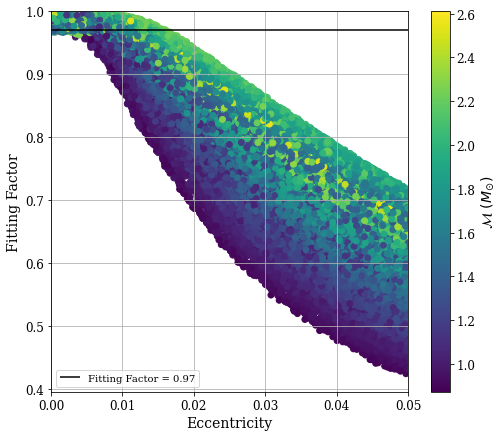

In [16]:
#CE2
fig = plt.figure(figsize=(8,7))
fig.patch.set_facecolor('white')

pos2 = plt.scatter(eccentricity_CE2, ff_CE2, c=mchirp_CE2, cmap='viridis')
plt.hlines(0.97,0,0.05, label = "Fitting Factor = 0.97", color = 'black')
plt.xlim(0,0.05)
plt.ylim(top=1.0)
plt.legend(loc = 'lower left')
plt.xlabel("Eccentricity")
plt.ylabel("Fitting Factor")
cbar = plt.colorbar(pos2)
cbar.set_label(r'$\mathcal{M}~(M_{\odot})$')

plt.show()

## Figure 5: Eccentricity Limit

In [17]:
eccen_range = np.arange(0.0,0.401,0.001)

CE1_match = np.zeros(len(eccen_range))
CE2_match = np.zeros(len(eccen_range))
aLIGO_match = np.zeros(len(eccen_range))

In [18]:
hp, _ = pycbc.waveform.get_fd_waveform(approximant="TaylorF2", mass1=1.4, mass2=1.4,
                         f_lower=7.0, delta_f=delta_f)
hp.resize(fd_length)

idx = 0
for ecc in eccen_range:
    
    sp, _ = pycbc.waveform.get_fd_waveform(approximant="TaylorF2Ecc", mass1=1.4, mass2=1.4,
                         f_lower=7.0, delta_f=delta_f, eccentricity = ecc)
    sp.resize(fd_length)
    
    CE1_match[idx], _ = match(hp, sp, psd=psd_ce1, low_frequency_cutoff=7.0)
    CE2_match[idx], _ = match(hp, sp, psd=psd_ce2, low_frequency_cutoff=7.0)
    aLIGO_match[idx], _ = match(hp, sp, psd=psd_aligo, low_frequency_cutoff=7.0)
    
    idx+=1

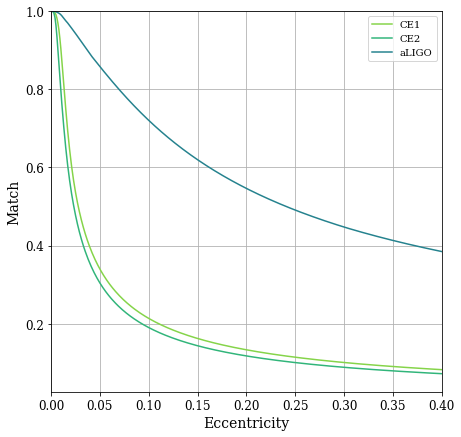

In [19]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(eccen_range, CE1_match, label = "CE1")
plt.plot(eccen_range, CE2_match, label = "CE2")
plt.plot(eccen_range, aLIGO_match, label = "aLIGO")
plt.legend()
plt.xlim(0,0.4)
plt.ylim(top=1.0)
plt.xlabel("Eccentricity")
plt.ylabel("Match")
plt.show()

## Figure 6: Eccentric Bank Fitting Factor

In [20]:
injection_sim_eccen_CE1 = 'fitting-factor-files/eccentric/eccentric-CE1-injection.txt'
eccen_simulation_data_CE1 = pd.read_csv(injection_sim_eccen_CE1, sep=" ", header=None)
eccen_simulation_data_CE1.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "template_eccentricity", "fitting factor"]
ff_eccen_CE1 = eccen_simulation_data_CE1['fitting factor']

In [21]:
injection_sim_eccen_CE2 = 'fitting-factor-files/eccentric/eccentric-CE2-injection.txt'
eccen_simulation_data_CE2 = pd.read_csv(injection_sim_eccen_CE2, sep=" ", header=None)
eccen_simulation_data_CE2.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "template_eccentricity", "fitting factor"]
ff_eccen_CE2 = eccen_simulation_data_CE2['fitting factor']

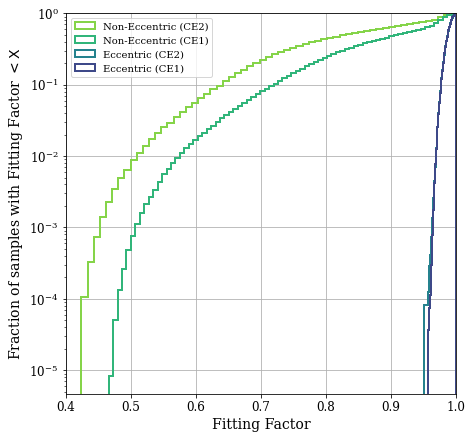

In [22]:
plt.hist(ff_CE2, bins='auto', histtype='step', linewidth=2.0, density=True, cumulative=True, label='Non-Eccentric (CE2)')
plt.hist(ff_CE1, bins='auto', histtype='step', linewidth=2.0, density=True, cumulative=True, label='Non-Eccentric (CE1)')
plt.hist(ff_eccen_CE2, bins='auto', histtype='step', linewidth=2.0, density=True, cumulative=True, label='Eccentric (CE2)')
plt.hist(ff_eccen_CE1, bins='auto', histtype='step', linewidth=2.0, density=True, cumulative=True, label='Eccentric (CE1)')
plt.xlabel('Fitting Factor')
plt.ylabel(r'Fraction of samples with Fitting Factor $< \mathsf{X}$')
plt.yscale('log')
plt.xlim(0.4,1.0)
plt.ylim(top=1.0)
plt.legend()
plt.show()

## Figure 7: Signal-to-Noise Ratio

In [23]:
injection_match_file_CE1_snr = 'fitting-factor-files/SNR/max-ff-CE1.txt'
simulation_data_CE1_snr = pd.read_csv(injection_match_file_CE1_snr, sep=" ", header=None)
simulation_data_CE1_snr.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "fitting factor"]
eccentricity_CE1_snr = simulation_data_CE1_snr['eccentricity']
ff_CE1_snr = simulation_data_CE1_snr['fitting factor']

In [24]:
injection_match_file_CE2_snr = 'fitting-factor-files/SNR/max-ff-CE2.txt'
simulation_data_CE2_snr = pd.read_csv(injection_match_file_CE2_snr, sep=" ", header=None)
simulation_data_CE2_snr.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "fitting factor"]
eccentricity_CE2_snr = simulation_data_CE2_snr['eccentricity']
ff_CE2_snr = simulation_data_CE2_snr['fitting factor']

In [25]:
injection_match_file_aligo_snr = 'fitting-factor-files/SNR/max-ff-aLIGO.txt'
simulation_data_aligo_snr = pd.read_csv(injection_match_file_aligo_snr, sep=" ", header=None)
simulation_data_aligo_snr.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "fitting factor"]
eccentricity_aligo_snr = simulation_data_aligo_snr['eccentricity']
ff_aligo_snr= simulation_data_aligo_snr['fitting factor']

In [26]:
injection_match_file_GW170817_snr = 'fitting-factor-files/SNR/max-ff-GW170817.txt'
simulation_data_GW170817_snr = pd.read_csv(injection_match_file_GW170817_snr, sep=" ", header=None)
simulation_data_GW170817_snr.columns = ["injection_mass1", "injection_mass2", "eccentricity", "template_mass1", "template_mass2", "fitting factor"]
eccentricity_GW170817_snr = simulation_data_GW170817_snr['eccentricity']
ff_GW170817_snr = simulation_data_GW170817_snr['fitting factor']

In [27]:
SNR_CE1 = np.sqrt(7.779/(2*(1-ff_CE1_snr[1:])))
SNR_CE2 = np.sqrt(7.779/(2*(1-ff_CE2_snr[1:])))
SNR_aligo = np.sqrt(7.779/(2*(1-ff_aligo_snr[1:])))
SNR_GW170817 = np.sqrt(7.779/(2*(1-ff_GW170817_snr[1:])))

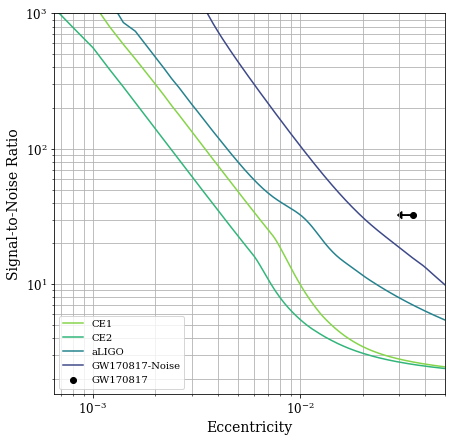

In [28]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(eccentricity_CE1_snr[1:], SNR_CE1, label="CE1")
plt.plot(eccentricity_CE2_snr[1:], SNR_CE2, label="CE2")
plt.plot(eccentricity_aligo_snr[1:], SNR_aligo, label="aLIGO")
plt.plot(eccentricity_GW170817_snr[1:], SNR_GW170817, label="GW170817-Noise")
plt.arrow(0.035, 32.4, -0.004, 0, head_width=4, head_length=0.0015, color='black')
plt.scatter(0.035, 32.4,  color="Black", label="GW170817")
plt.xscale('log')
plt.yscale('log')
plt.xlim(6.5*10**-4,0.05)
plt.ylim(top=10**3)
plt.xlabel("Eccentricity")
plt.ylabel("Signal-to-Noise Ratio")
plt.legend(loc='lower left')
plt.grid(which='minor')
plt.show()